<a href="https://colab.research.google.com/github/AishlyManglani/Data-Mining-Assignments/blob/main/Semma/semma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/creditcard.csv')

# Check the class distribution
class_counts = df['Class'].value_counts()
print("Class distribution:\n", class_counts)

# Downsample if necessary to balance the dataset
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0].sample(n=len(fraud))

# Combine into a single DataFrame
df_sampled = pd.concat([fraud, non_fraud])

# Shuffle the data
df_sampled = df_sampled.sample(frac=1).reset_index(drop=True)

# Verify the balance
print("Sampled class distribution:\n", df_sampled['Class'].value_counts())


Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64
Sampled class distribution:
 Class
0    492
1    492
Name: count, dtype: int64


                Time          V1          V2          V3          V4  \
count     984.000000  984.000000  984.000000  984.000000  984.000000   
mean    87044.310976   -2.342242    1.875470   -3.539041    2.253823   
std     48256.667027    5.508137    3.603252    6.223133    3.222147   
min       183.000000  -30.552380   -8.402154  -31.103685   -4.826127   
25%     45273.000000   -2.742612   -0.094711   -5.120349   -0.079811   
50%     78208.000000   -0.792645    0.943748   -1.390574    1.342183   
75%    133742.750000    1.038847    2.800804    0.206178    4.229802   
max    172556.000000    2.369267   22.057729    3.775152   12.114672   

               V5          V6          V7          V8          V9  ...  \
count  984.000000  984.000000  984.000000  984.000000  984.000000  ...   
mean    -1.551314   -0.672403   -2.791191    0.324570   -1.305124  ...   
std      4.205785    1.749697    5.844973    4.856892    2.305772  ...   
min    -22.105532   -6.406267  -43.557242  -41.044261  

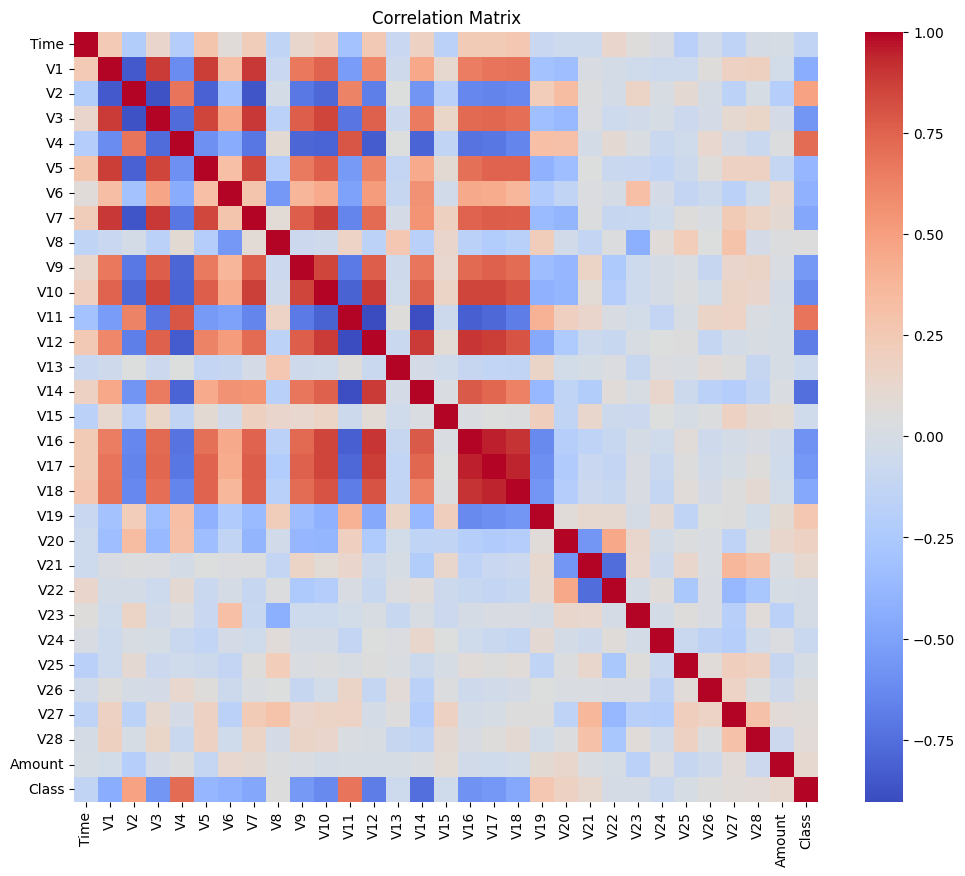

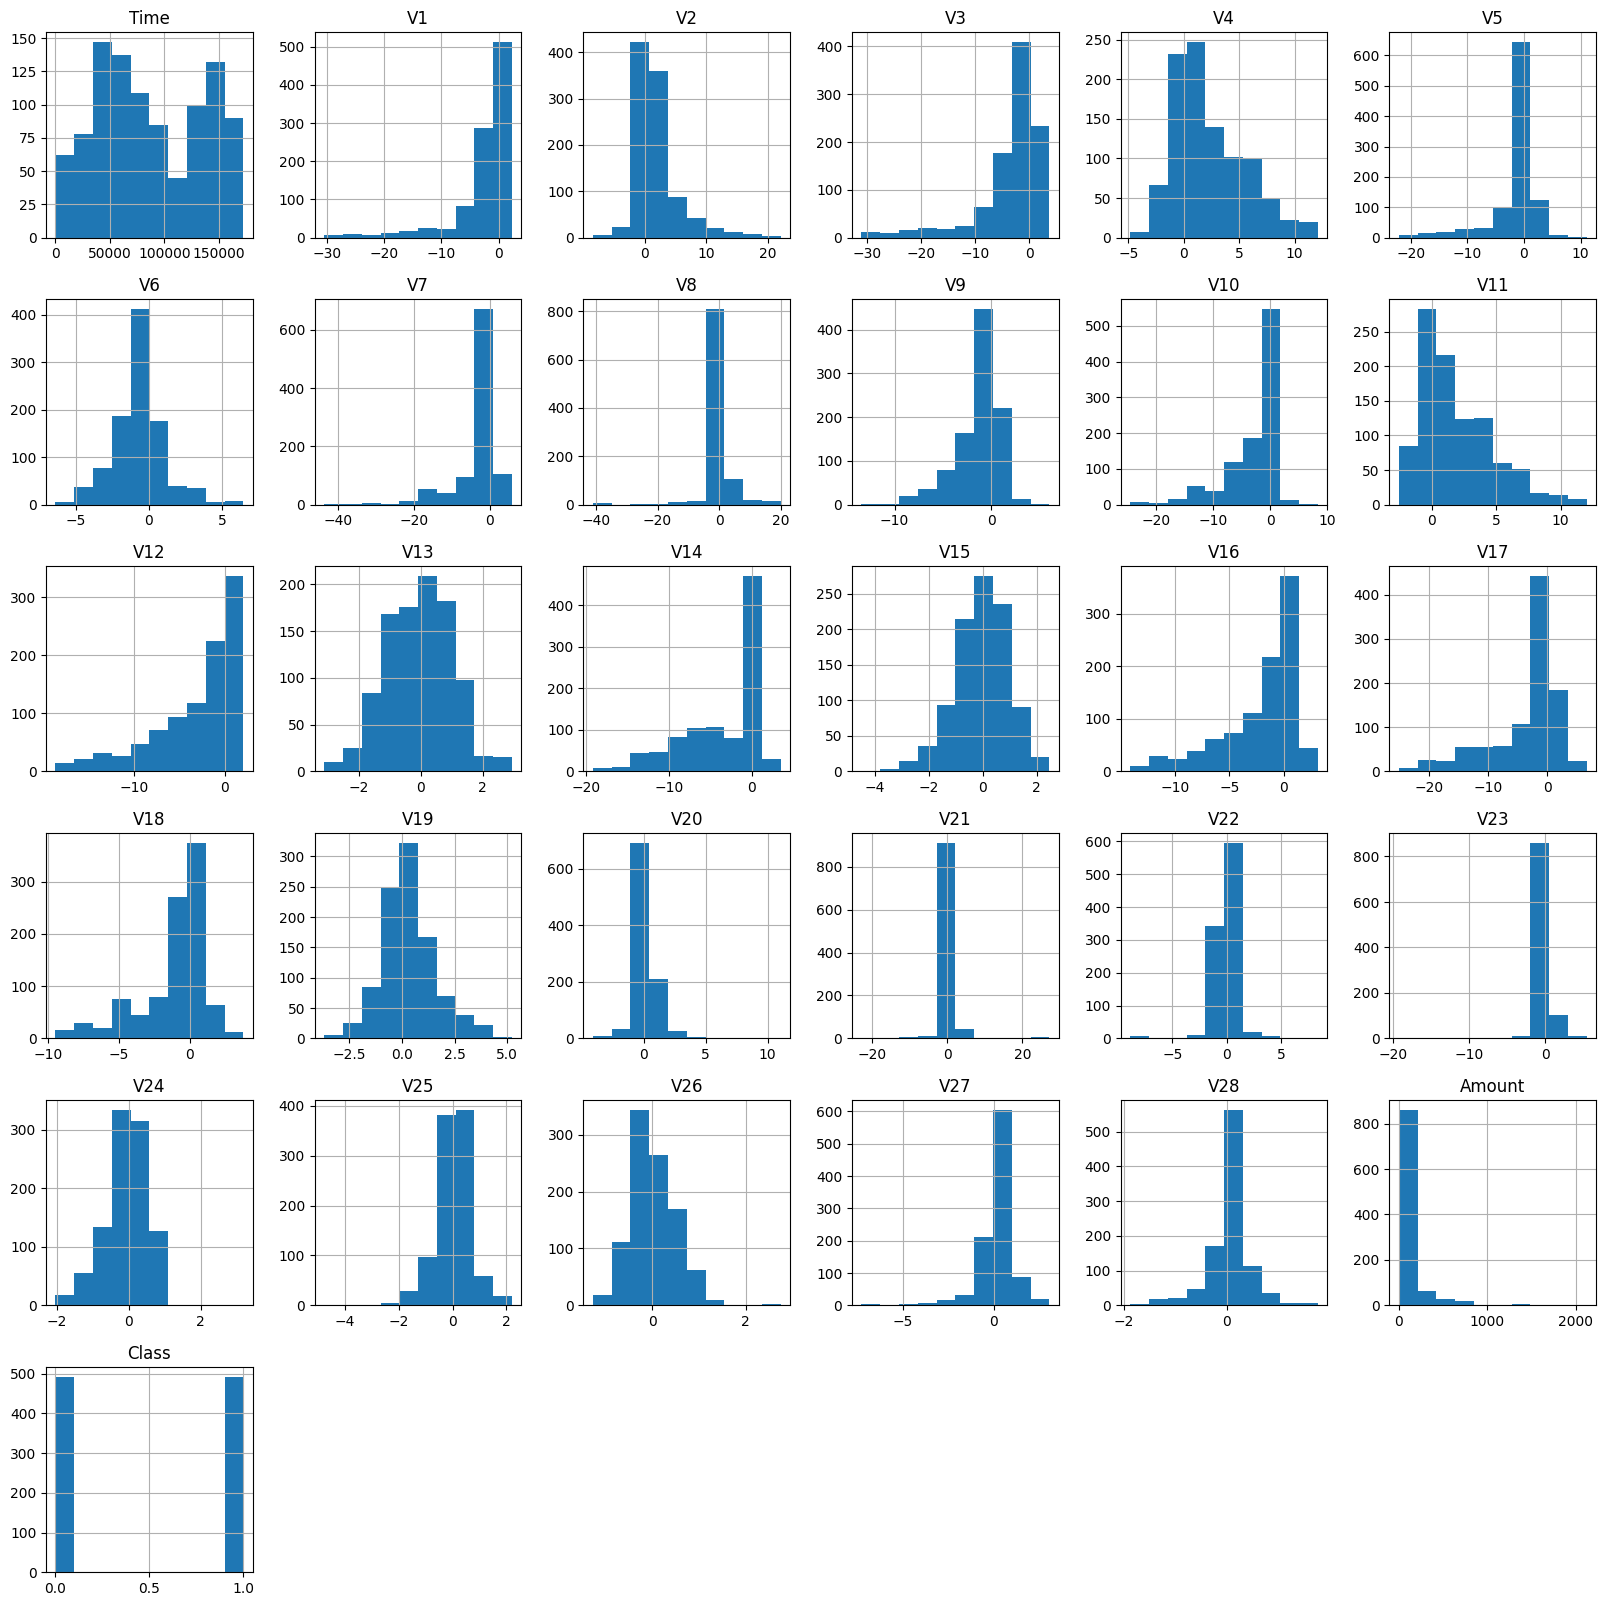

Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df_sampled.describe())

# Correlation matrix
corr_matrix = df_sampled.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Visualize the distribution of each feature
df_sampled.hist(figsize=(20, 20))
plt.show()

# Check for missing values
print("Missing values:\n", df_sampled.isnull().sum())


In [3]:
from sklearn.preprocessing import StandardScaler

# Separate features and labels
X = df_sampled.drop('Class', axis=1)
y = df_sampled['Class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier inspection
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Optional: Add interaction features or polynomial features if needed
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

print("Transformed feature matrix shape:", X_poly.shape)


Transformed feature matrix shape: (984, 465)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))
print("AUC:", roc_auc_score(y_test, y_pred_lr))

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))
print("AUC:", roc_auc_score(y_test, y_pred_rf))

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting:\n", classification_report(y_test, y_pred_gb))
print("AUC:", roc_auc_score(y_test, y_pred_gb))


Logistic Regression:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       144
           1       0.95      0.88      0.91       152

    accuracy                           0.91       296
   macro avg       0.91      0.91      0.91       296
weighted avg       0.92      0.91      0.91       296

AUC: 0.9131944444444444
Random Forest:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       144
           1       0.98      0.88      0.93       152

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296

AUC: 0.9303728070175439
Gradient Boosting:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       144
           1       0.98      0.88      0.93       152

    accuracy                           0.93       296
   macro avg       0.9

In [5]:
from sklearn.metrics import confusion_matrix

# Confusion matrices
print("Confusion Matrix for Logistic Regression:\n", confusion_matrix(y_test, y_pred_lr))
print("Confusion Matrix for Random Forest:\n", confusion_matrix(y_test, y_pred_rf))
print("Confusion Matrix for Gradient Boosting:\n", confusion_matrix(y_test, y_pred_gb))

# AUC scores
print("AUC for Logistic Regression:", roc_auc_score(y_test, y_pred_lr))
print("AUC for Random Forest:", roc_auc_score(y_test, y_pred_rf))
print("AUC for Gradient Boosting:", roc_auc_score(y_test, y_pred_gb))


Confusion Matrix for Logistic Regression:
 [[137   7]
 [ 19 133]]
Confusion Matrix for Random Forest:
 [[141   3]
 [ 18 134]]
Confusion Matrix for Gradient Boosting:
 [[141   3]
 [ 18 134]]
AUC for Logistic Regression: 0.9131944444444444
AUC for Random Forest: 0.9303728070175439
AUC for Gradient Boosting: 0.9303728070175439
